In [1]:
import pandas as pd

data = {
    'Student_ID': range(1, 11),
    'Math_Score': [85, 90, 78, 88, 92, None, 76, 95, 89, 77],
    'Science_Score': [91, 87, 85, 88, 90, 75, 80, 93, None, 79],
    'English_Score': [None, 85, 79, 80, 83, 77, 82, 86, 90, 88]
}

df = pd.DataFrame(data)

df.to_csv('academic_performance.csv', index=False)

print("CSV file created successfully.")


CSV file created successfully.


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler, PowerTransformer

In [3]:
df = pd.read_csv("academic_performance.csv")
print(df.head())

   Student_ID  Math_Score  Science_Score  English_Score
0           1        85.0           91.0            NaN
1           2        90.0           87.0           85.0
2           3        78.0           85.0           79.0
3           4        88.0           88.0           80.0
4           5        92.0           90.0           83.0


In [5]:
df = pd.DataFrame(data)

df.fillna(df.mean(numeric_only=True), inplace=True)

numeric_cols = ['Math_Score', 'Science_Score', 'English_Score']
z_scores = np.abs(df[numeric_cols].apply(zscore))

df = df[(z_scores < 3).all(axis=1)]

scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

pt = PowerTransformer()
df['Math_Score'] = pt.fit_transform(df[['Math_Score']])

print(df)

   Student_ID  Math_Score  Science_Score  English_Score
0           1   -0.207620   1.038053e+00       0.000000
1           2    0.673479   3.053097e-01       0.433229
2           3   -1.179072  -6.106194e-02      -1.126396
3           4    0.300101   4.884955e-01      -0.866459
4           5    1.070404   8.548672e-01      -0.086646
5           6   -0.118928  -1.892920e+00      -1.646272
6           7   -1.423718  -9.769911e-01      -0.346583
7           8    1.704441   1.404425e+00       0.693167
8           9    0.483653  -2.603227e-15       1.732917
9          10   -1.302740  -1.160177e+00       1.213042


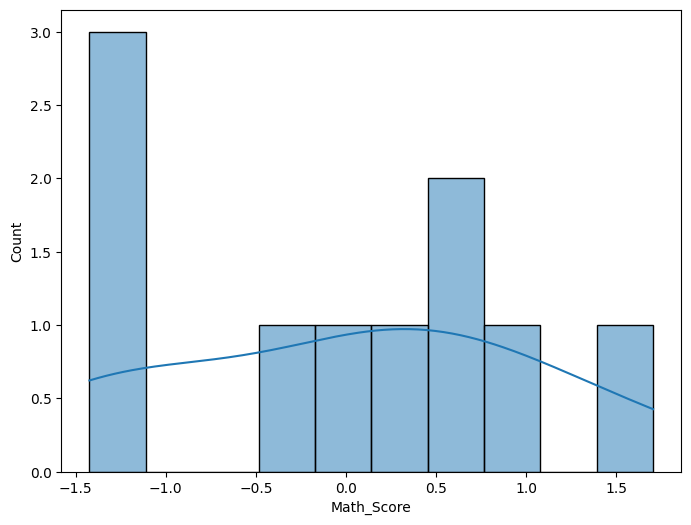

In [6]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Math_Score'], kde=True, bins=10)
plt.show()